In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from sklearn import neighbors
import sys

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset = dataset.drop(["Name","Ticket","Cabin","PassengerId"],axis = 1)

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
dataset["Sex"] = le.fit_transform(dataset["Sex"])

In [9]:
import numpy as np
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])

In [10]:
dataset["Age"] = new_age_var

In [11]:
freq_port = dataset.Embarked.dropna().mode()[0]
freq_port

'S'

In [12]:
combine = [dataset]

In [13]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [14]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [15]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


# KNN

In [16]:
def knn_score(dataset,st):
    y = dataset[st]
    X = dataset.drop([st],axis = 1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
    knnmax = -sys.maxsize -1 
    for i in range(1,len(X_train)):
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        re = knn.fit(X_train,y_train).score(X_test,y_test)
        if(re > knnmax):
            knnmax = re
    return knnmax,knn,X_test,y_test

__Model-1(DV - Survived , IDV - Remaining)__

In [17]:
res = list(knn_score(dataset,"Survived"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.7574626865671642


In [18]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [19]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[168,   0],
       [100,   0]], dtype=int64)

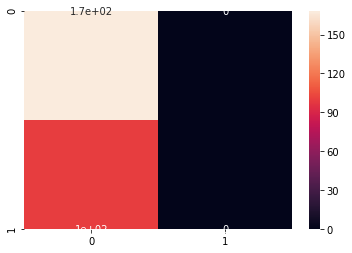

In [20]:
sns.heatmap(cf, annot = True)

__Model-2(DV - Pclass , IDV - Remaining)__

In [21]:
res = list(knn_score(dataset,"Pclass"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.8544776119402985


In [22]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [23]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[  0,   0,  60],
       [  0,   0,  52],
       [  0,   0, 156]], dtype=int64)

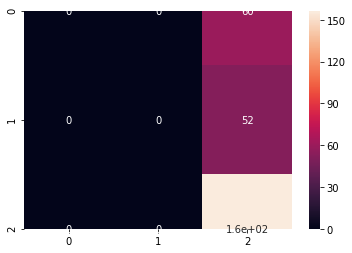

In [24]:
sns.heatmap(cf, annot = True)

__Model-3(DV - SibSp , IDV - Remaining)__

In [25]:
res = list(knn_score(dataset,"SibSp"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.75


In [26]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [27]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[181,   0,   0,   0,   0,   0],
       [ 65,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0]], dtype=int64)

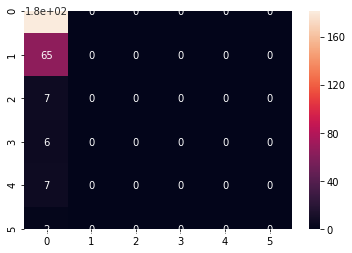

In [28]:
sns.heatmap(cf, annot = True)

__Model-4(DV - Parch , IDV - Remaining)__

In [29]:
res = list(knn_score(dataset,"Parch"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.8246268656716418


In [30]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [31]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[204,   0,   0,   0,   0],
       [ 40,   0,   0,   0,   0],
       [ 21,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0]], dtype=int64)

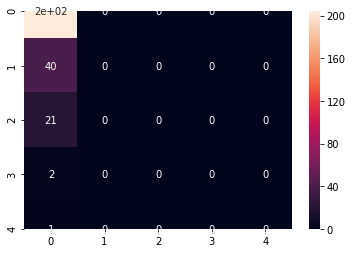

In [32]:
sns.heatmap(cf, annot = True)

__Model-5(DV - Sex , IDV - Remaining)__

In [33]:
res = list(knn_score(dataset,"Sex"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.6977611940298507


In [34]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [35]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[  0,  99],
       [  0, 169]], dtype=int64)

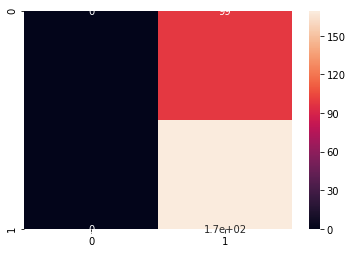

In [36]:
sns.heatmap(cf, annot = True)

__Model-6(DV - Embarked , IDV - Remaining)__

In [37]:
res = list(knn_score(dataset,"Embarked"))
print("Accuracy Score:",res[0])

Accuracy Score: 0.7761194029850746


In [38]:
knn = res[1]
X_test = res[2]
y_test = res[3]
y_pred = knn.predict(X_test)

In [39]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[187,   0,   0],
       [ 60,   0,   0],
       [ 21,   0,   0]], dtype=int64)

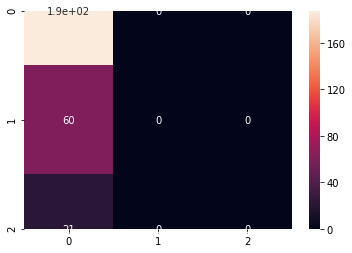

In [40]:
sns.heatmap(cf, annot = True)

# SVM

In [41]:
from sklearn import svm

In [47]:
def svm_test(dataset,st):
    y = dataset[st]
    X = dataset.drop([st],axis = 1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
    clf = svm.SVC(gamma = 0.01,C = 100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_pred,y_test

__Model-1(DV - Pclass, IDV - Remaining)__

In [48]:
re = list(svm_test(dataset,"Pclass"))
y_pred = re[0]
y_test = re[1]

In [49]:
accuracy_score(y_test,y_pred)

0.8843283582089553

In [50]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[ 58,   2,   0],
       [  8,  39,   5],
       [  3,  13, 140]], dtype=int64)

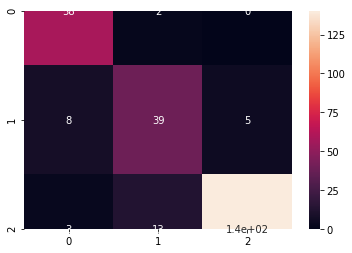

In [51]:
sns.heatmap(cf, annot = True)

__Model-2(DV - Survived, IDV - Remaining)__

In [52]:
re = list(svm_test(dataset,"Survived"))
y_pred = re[0]
y_test = re[1]

In [53]:
accuracy_score(y_test,y_pred)

0.7835820895522388

In [54]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[145,  23],
       [ 35,  65]], dtype=int64)

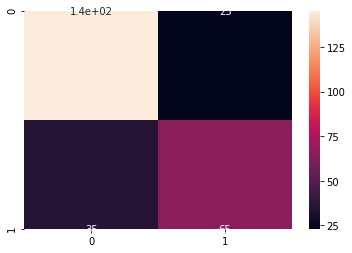

In [55]:
sns.heatmap(cf, annot = True)

__Model-3(DV - Sex, IDV - Remaining)__

In [56]:
re = list(svm_test(dataset,"Sex"))
y_pred = re[0]
y_test = re[1]

In [57]:
accuracy_score(y_test,y_pred)

0.746268656716418

In [58]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[ 57,  42],
       [ 26, 143]], dtype=int64)

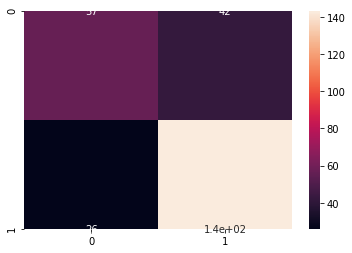

In [59]:
sns.heatmap(cf, annot = True)

__Model-4(DV - SibSp, IDV - Remaining)__

In [60]:
re = list(svm_test(dataset,"SibSp"))
y_pred = re[0]
y_test = re[1]

In [61]:
accuracy_score(y_test,y_pred)

0.7425373134328358

In [62]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[159,  20,   2,   0,   0,   0],
       [ 29,  31,   5,   0,   0,   0],
       [  1,   3,   1,   2,   0,   0],
       [  1,   2,   0,   3,   0,   0],
       [  3,   1,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

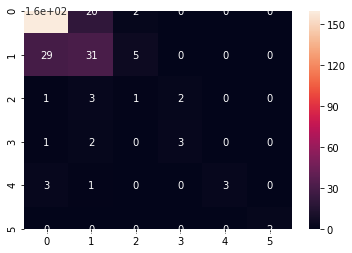

In [63]:
sns.heatmap(cf, annot = True)

__Model-5(DV - Parch, IDV - Remaining)__

In [64]:
re = list(svm_test(dataset,"Parch"))
y_pred = re[0]
y_test = re[1]

In [65]:
accuracy_score(y_test,y_pred)

0.8246268656716418

In [66]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[193,   6,   5,   0,   0,   0],
       [ 22,  16,   1,   1,   0,   0],
       [  6,   3,  12,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0]], dtype=int64)

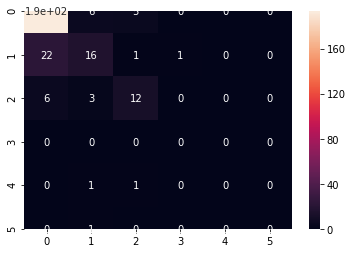

In [67]:
sns.heatmap(cf, annot = True)

__Model-6(DV - Embarked, IDV - Remaining)__

In [70]:
re = list(svm_test(dataset,"Embarked"))
y_pred = re[0]
y_test = re[1]

In [71]:
accuracy_score(y_test,y_pred)

0.75

In [72]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[168,  14,   5],
       [ 33,  24,   3],
       [ 12,   0,   9]], dtype=int64)

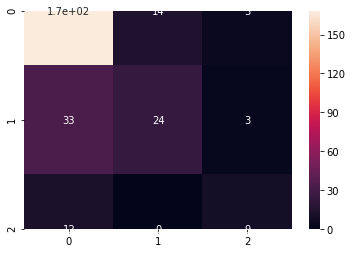

In [73]:
sns.heatmap(cf, annot = True)